# **FINAL REPORT**

<span style="font-size: 15px;">

**Broad question:** What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ across various player types?

**Specific question:** Can the amount of hours playing video games and the age of the player predict their subscription status to a gaming newsletter? Additionally, does this predictive relationship differ across players of different experience levels?
</span>

### **Background Information**

<span style="font-size: 15px;">

A reaearch group in Computer Science at UBC collected data about how people play video games. They are recording players' actions as the players navigate through the Minecraft server that the group have set up. They need to hone in on specific recruitment efforts, and make sure they have enough resources (i.e., software licenses) to handle the number of players they attract. Through our final report, we are targetting the effects that the variables played_hours and age have on the players' subscription status.

<span>


In [1]:
library(tidyverse)
url <- ("https://raw.githubusercontent.com/msyr125/DSCI-100-GROUP-PROJECT/refs/heads/main/players.csv")
players <- read_csv(url)
head(players)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


### **Data Description**

<span style="font-size: 15px;">

The dataset players.csv contains information about individual Minecraft players collected by UBC research group studying player behaviour. It includes demographic data, playtime, and experience level for each player along with whether they subscribed to a game-related newsletter.
    
**Number of observations:** 196 <br>
**Number of variables:** 7 <br>
**File name:** players.csv


| Variable Name | Type | Description | Example Value |
|:--------------|:----:|:-----------:|:-------------:|
| experience | chr | Player's experience level (e.g. "Beginner", "Amateur", "Regular", "Pro", "Veteran") | "Pro" |
| subscribe | lgl | Whether the player subscribed to the newsletter (TRUE = subscribed, FALSE = not subscribed) | TRUE |
| hashedEmail | chr | Anonymized email identifier (used for unique player identification) | "f19e136ddd..." |
| played_hours | dbl | Total hours the player spent playing on the server | 30.3 |
| name | chr | Player's in-game name | "Morgan" |
| gender | chr | Player's gender, typically "Male" or "Female" (also includes "Other", "Prefer not to say", "Two-Spirited", "Agender", and "Non-binary") | "Male" | 
| Age | dbl | Player's age in years | 21 |

**Fig 1: Description of data variables**
</span>  

#### **Summary Statistics**
<span style="font-size: 15px;">
    
**Experience:**
* Pro = 14
* Veteran = 48
* Regular = 36
* Amateur = 63
* Beginner = 35

**Subscribers:**
* Number of people subscribed = 144
* Number of people not subscribed = 52

**Hours Played:**
* Minimum hours played = 0
* Maximum hours played = 223.1
* Mean hours played = 5.85
* Standard deviation of hours played = 28.36

**Age of Players:**
* Minimum age of player = 9
* Maximum age of player = 58
* Mean age of player = 21.14
* Standard deviation of player age = 7.39

**Gender Distribution of Players:**
* Male players = 124
* Female players = 37
* Non-binary players = 7
* Two-Spirited players = 6
* Prefer not to say = 11
</span>

In [2]:
# Code to perform summary statistics

filter_pro <- players |>
    filter(experience == 'Pro')
## Pro = 14

filter_amateur <- players |>
    filter(experience == 'Amateur')
## Amateur = 63

filter_vet <- players |>
    filter(experience == 'Veteran')
## Veteran = 48

filter_beg <- players |>
    filter(experience == 'Beginner')
## Beginner = 35

filter_reg <- players |>
    filter(experience == 'Regular')
## Regular = 36

filter_sub <- players |>
    filter(subscribe == 'FALSE')
## TRUE = 144, FALSE = 52

min_hrs <- players |>
    pull(played_hours) |>
    min(na.rm = TRUE)
## Min hrs = 0

max_hrs <- players |>
    pull(played_hours) |>
    max(na.rm = TRUE)
## Max hrs = 223.1

mean_hrs <- players |>
    pull(played_hours) |>
    mean(na.rm = TRUE)
## Mean = 5.85

stdev_hrs <- players |>
    pull(played_hours) |>
    sd(na.rm = TRUE)
## Standard deviation = 28.36

min_age <- players |>
    pull(Age) |>
    min(na.rm = TRUE)
## Min age = 9

max_age <- players |>
    pull(Age) |>
    max(na.rm = TRUE)
## Max age = 58

mean_age <- players |>
    pull(Age) |>
    mean(na.rm = TRUE)
## Age = 21.14

stdev_age <- players |>
    pull(Age) |>
    sd(na.rm = TRUE)
## Standard deviation = 7.39

male <- players |>
    filter(gender == 'Male')
## Male players = 124

female <- players |>
    filter(gender == 'Female')
## Female players = 37

non_binary <- players |>
    filter(gender == 'Non-binary')
## Non-binary players =7

two_spirited <- players |>
    filter(gender == 'Two-Spirited')
## Two-Spirited players = 6

none <- players |>
    filter(gender == 'Prefer not to say')
## Prefer not to say = 11

## Methods & Results

We are first loading the libraries necessary for all our wrangling and analysis, and then loading the data

In [3]:
library(dplyr)
library(ggplot2)
library(tidymodels)

── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Learn how to get started at https://www.tidymodels.org/start/



We are tidying the data so that the experience and the subscribe variables are turned into factors

In [4]:
tidy_players <- players |>
    filter(!is.na(Age)) |>
    mutate(
        experience = as.factor(experience),
        subscribe = as.factor(subscribe)
    )
tidy_players

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


Now, we are looking at three different relationships between the variables, so we decided to create a scatterplot for played_hours vs age, then created another plot with facets for the experience levels, and then a bar plot showing the number of subscribers at different experience levels. 

For Fig 2 & 3, the variables are both numerical, and so doing a scatterplot made the most sense. These two figures helped us see how the varibales played hours and age influenced their likelihood to subscribe to the newsletter, and because there was no clear relationship, we decided to do the bar plot (Fig 4). From the bar plot, we got to see the distribution of the subscribers across all experience levels and see who is more likely to subscribe. 

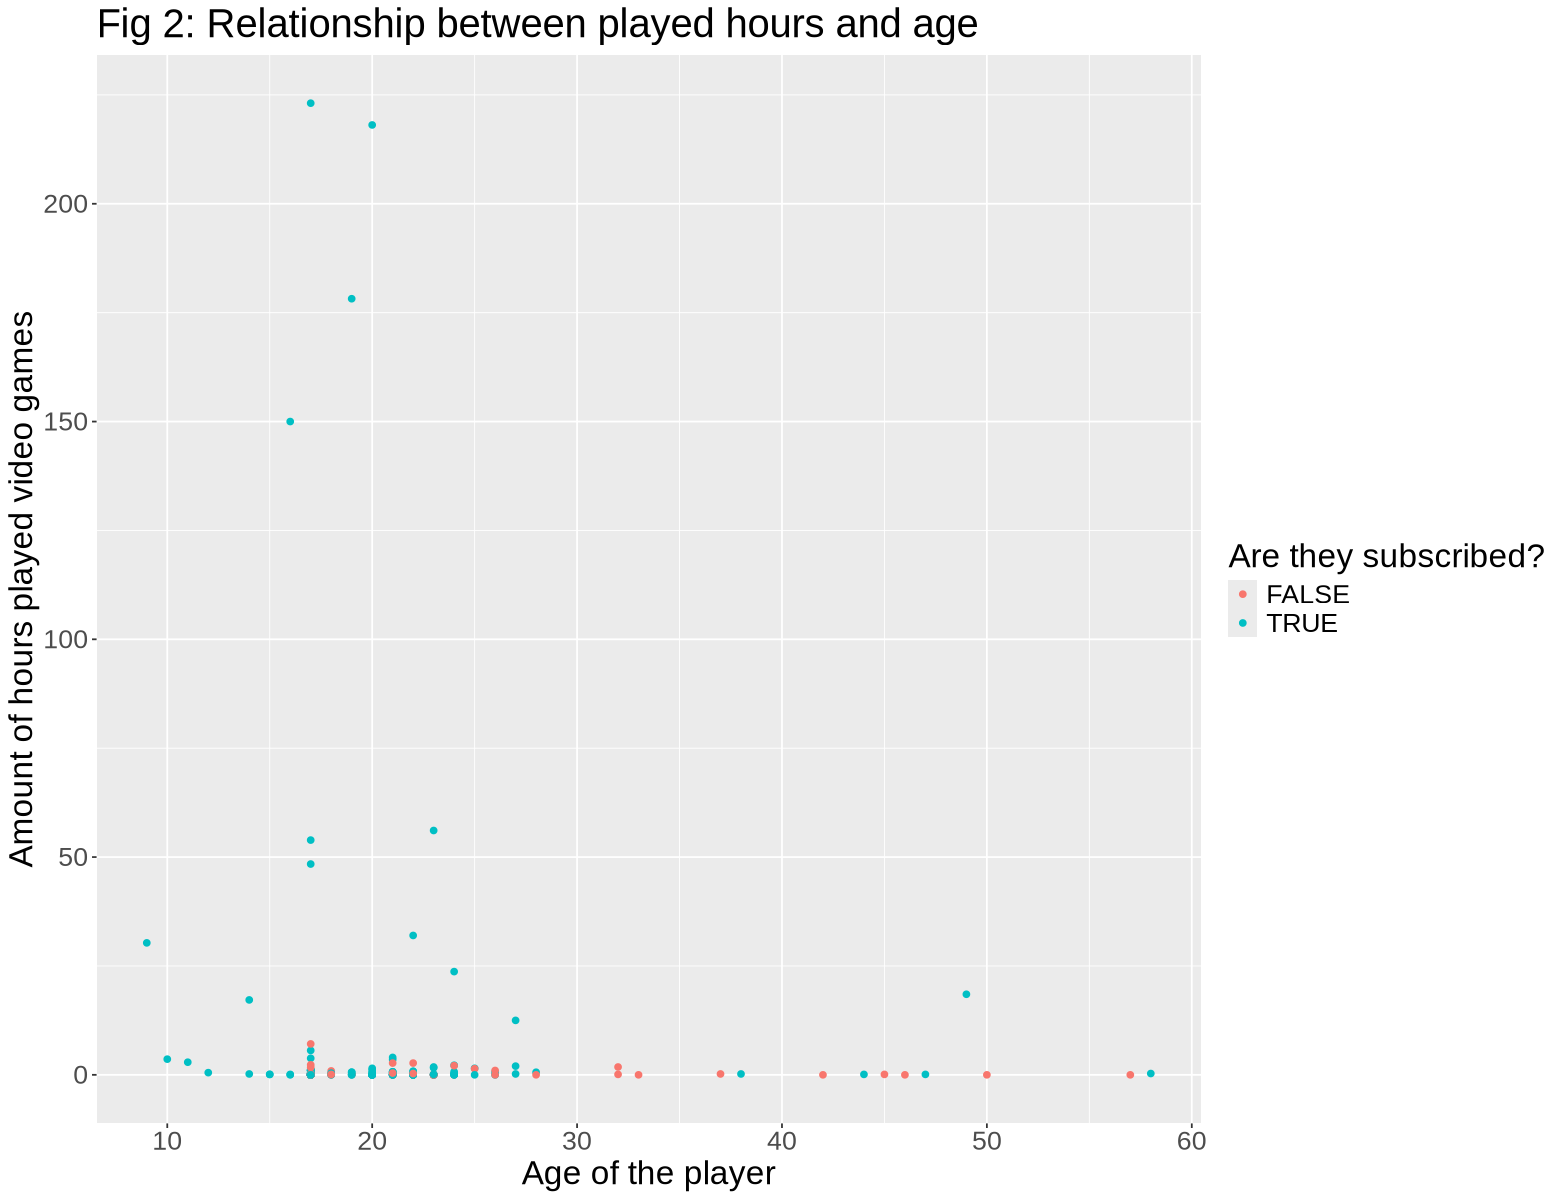

In [5]:
# Visualisations
options(repr.plot.width = 13, repr.plot.height = 10)
played_hrs_vs_age <- ggplot(tidy_players, aes(x = Age, y = played_hours, color = subscribe)) +
    geom_point() +
    labs(x = "Age of the player", y = "Amount of hours played video games", color = "Are they subscribed?", title = "Fig 2: Relationship between played hours and age") + 
    theme(text = element_text(size = 20))
played_hrs_vs_age

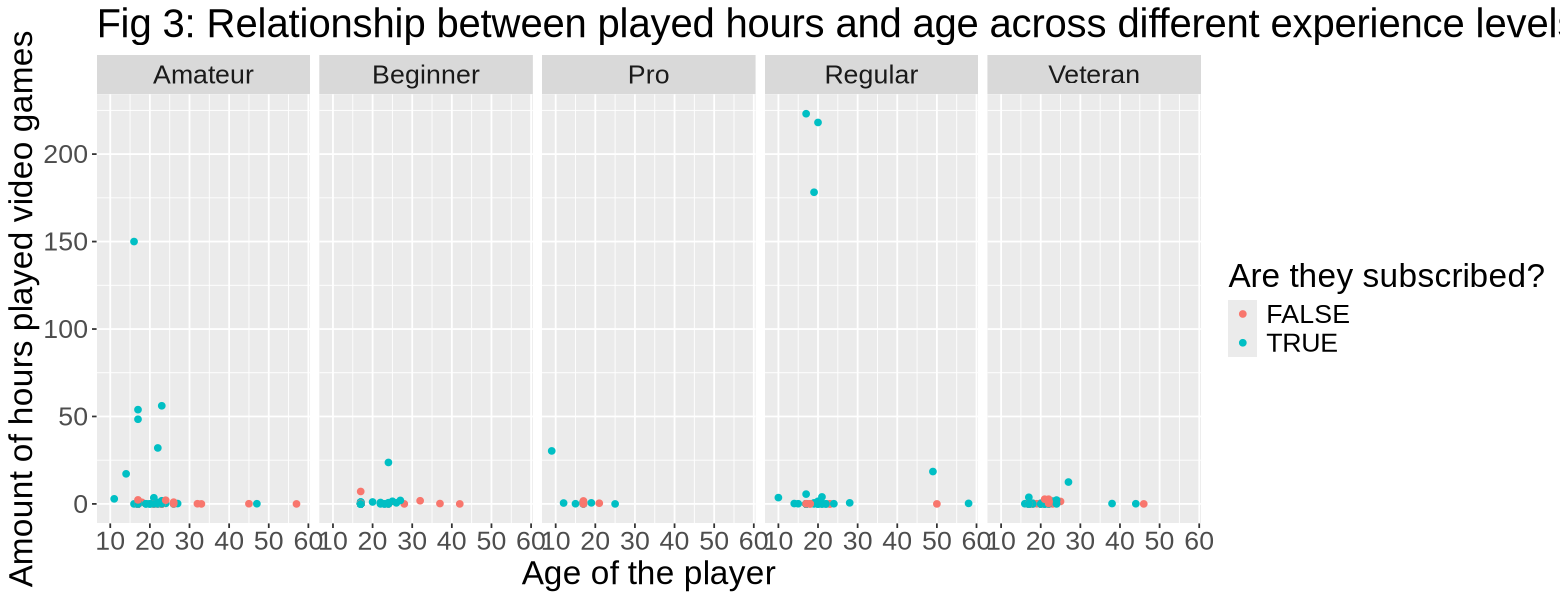

In [6]:
options(repr.plot.width = 13, repr.plot.height = 5)
played_hrs_vs_age <- ggplot(tidy_players, aes(x = Age, y = played_hours, color = subscribe)) +
    geom_point() +
    facet_grid(~ experience) +
    labs(x = "Age of the player", y = "Amount of hours played video games", color = "Are they subscribed?", 
         title = "Fig 3: Relationship between played hours and age across different experience levels") + 
    theme(text = element_text(size = 20))
played_hrs_vs_age

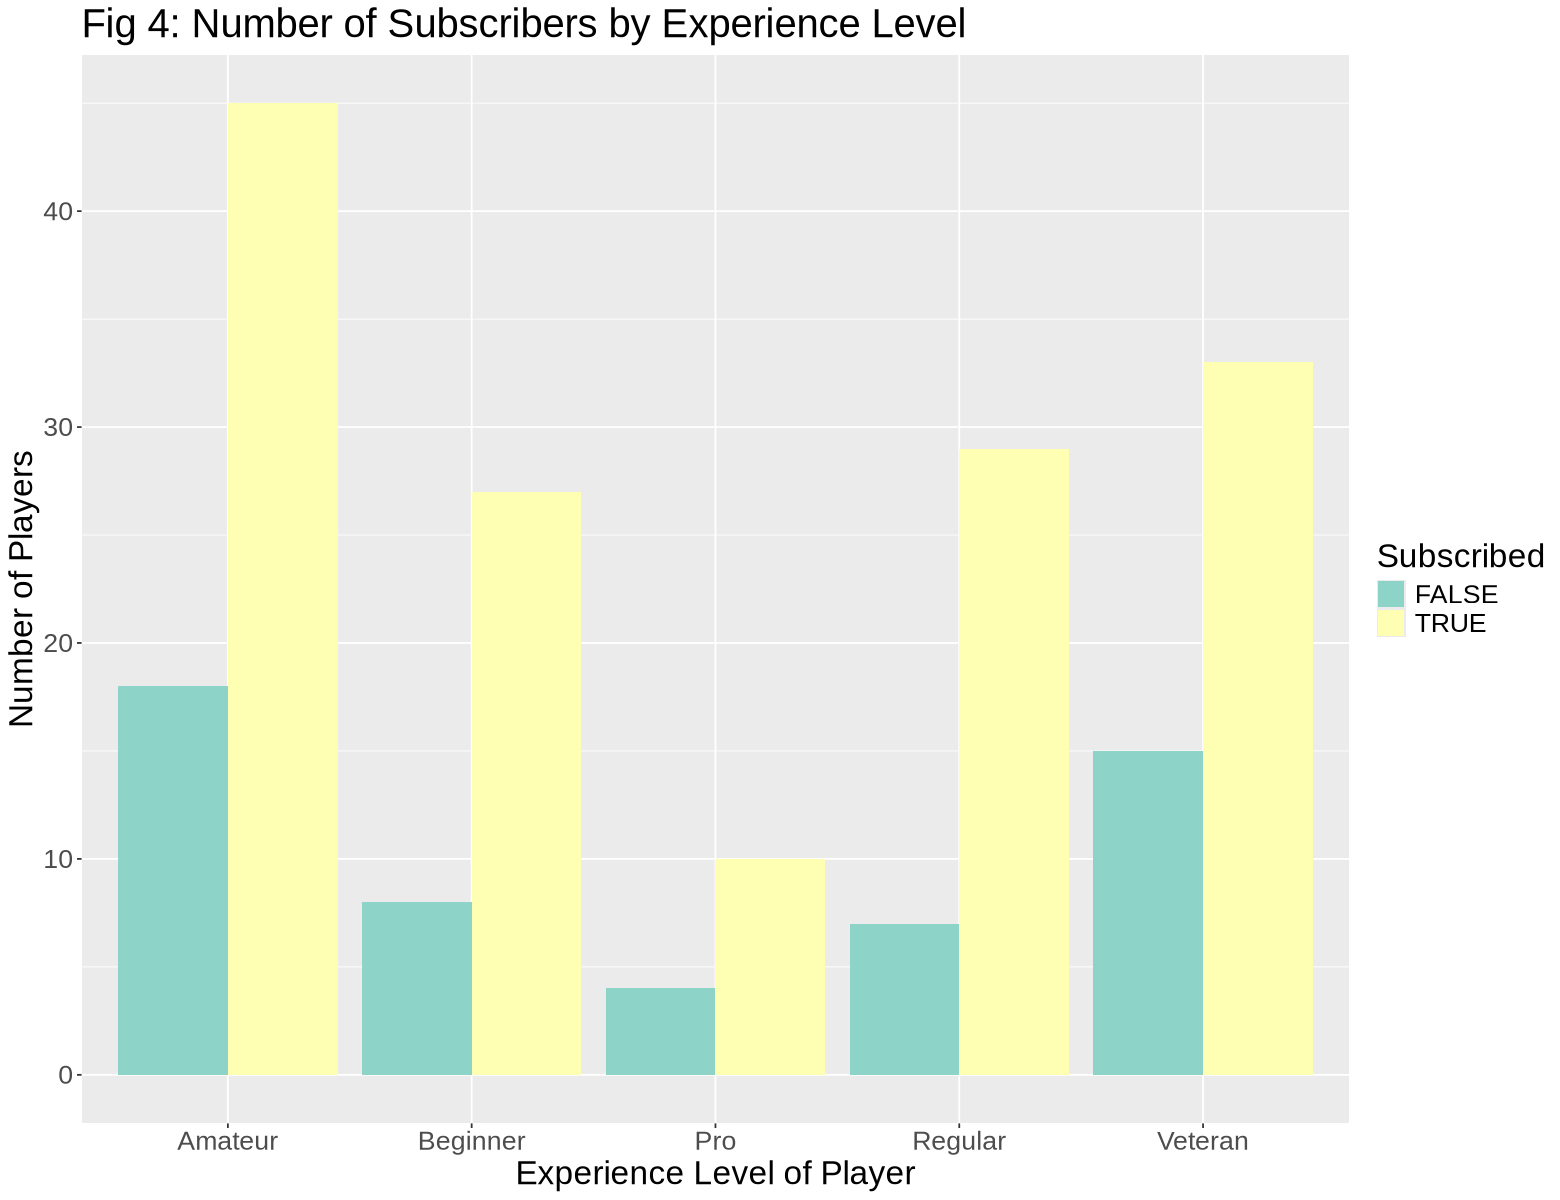

In [7]:
options(repr.plot.height = 10, repr.plot.width = 13)

experience_subs_plot <- players |>
    ggplot(aes(x = experience, fill = subscribe)) +
    geom_bar(position = "dodge") + 
    scale_fill_brewer(palette = "Set3") +
    labs(
        x = "Experience Level of Player", 
        y = "Number of Players", 
        fill = "Subscribed"
        ) +
    ggtitle("Fig 4: Number of Subscribers by Experience Level") + 
    theme(text = element_text(size = 20)) 
experience_subs_plot

To address our specific question, I will use a K-Nearest Neighbours (K-NN) classification model. K-NN is an appropriate choice because my response variable, subscribe, is binary (TRUE/FALSE), and K-NN naturally handles categorical classification outcomes. Our explanatory variables (played_hours, Age, and experience) consist of numeric and categorical predictors that can be easily incorporated into a K-NN framework.

**Why is K-NN the right choice?** <br>
K-NN is specifically designed to classify observations into categories such as subscribers vs. non-subscribers
K-NN does not assume linear relationships between the predictors and the response, so it is more flexible when modelling human behaviour like playing habits
It is intuitive, K-NN predicts a player's subscripton status based on similar players

**Assumptions** <br>
For K-NN to work, the variables must be scaled appropriately because it assumes that similarity in predictors reflect similarity in the outcome
K-NN also depends heavily on the distribution of the data, so the training data must have enough observations for all experience levels and subscription status

**Potential limitations** <br>
Variables measured on diffeent scales can easily distort distances, so needs to be standardised
Results can vary depending on the value of k chosen

First we split the data into a training and testing set into a 75:25 split. Then we did our 5-fold and tuned for neighbors. Based on the size of the dataset, we chose our k values between 3 and 20. 

In [8]:
set.seed(9999) 

knn_split <- initial_split(tidy_players, prop = 0.75, strata = played_hours)
knn_train <- training(knn_split)
knn_test <- testing(knn_split)

knn_recipe <- recipe(subscribe ~ played_hours + Age + experience, data = knn_train) |>
    step_scale(all_numeric_predictors()) |>
    step_center(all_numeric_predictors())
knn_recipe

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

knn_vfold <- vfold_cv(knn_train, v = 5, strata = subscribe)

k_vals <- tibble(neighbors = seq(from = 3, to = 20, by = 1))

knn_fit <- workflow() |>
    add_recipe(knn_recipe) |>
    add_model(knn_spec) |>
    tune_grid(resamples = knn_vfold, grid = k_vals) |>
    collect_metrics()



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 3



── Operations 

• Scaling for: all_numeric_predictors()

• Centering for: all_numeric_predictors()



We performed a cross-val plot to check what the best k would be for our analysis

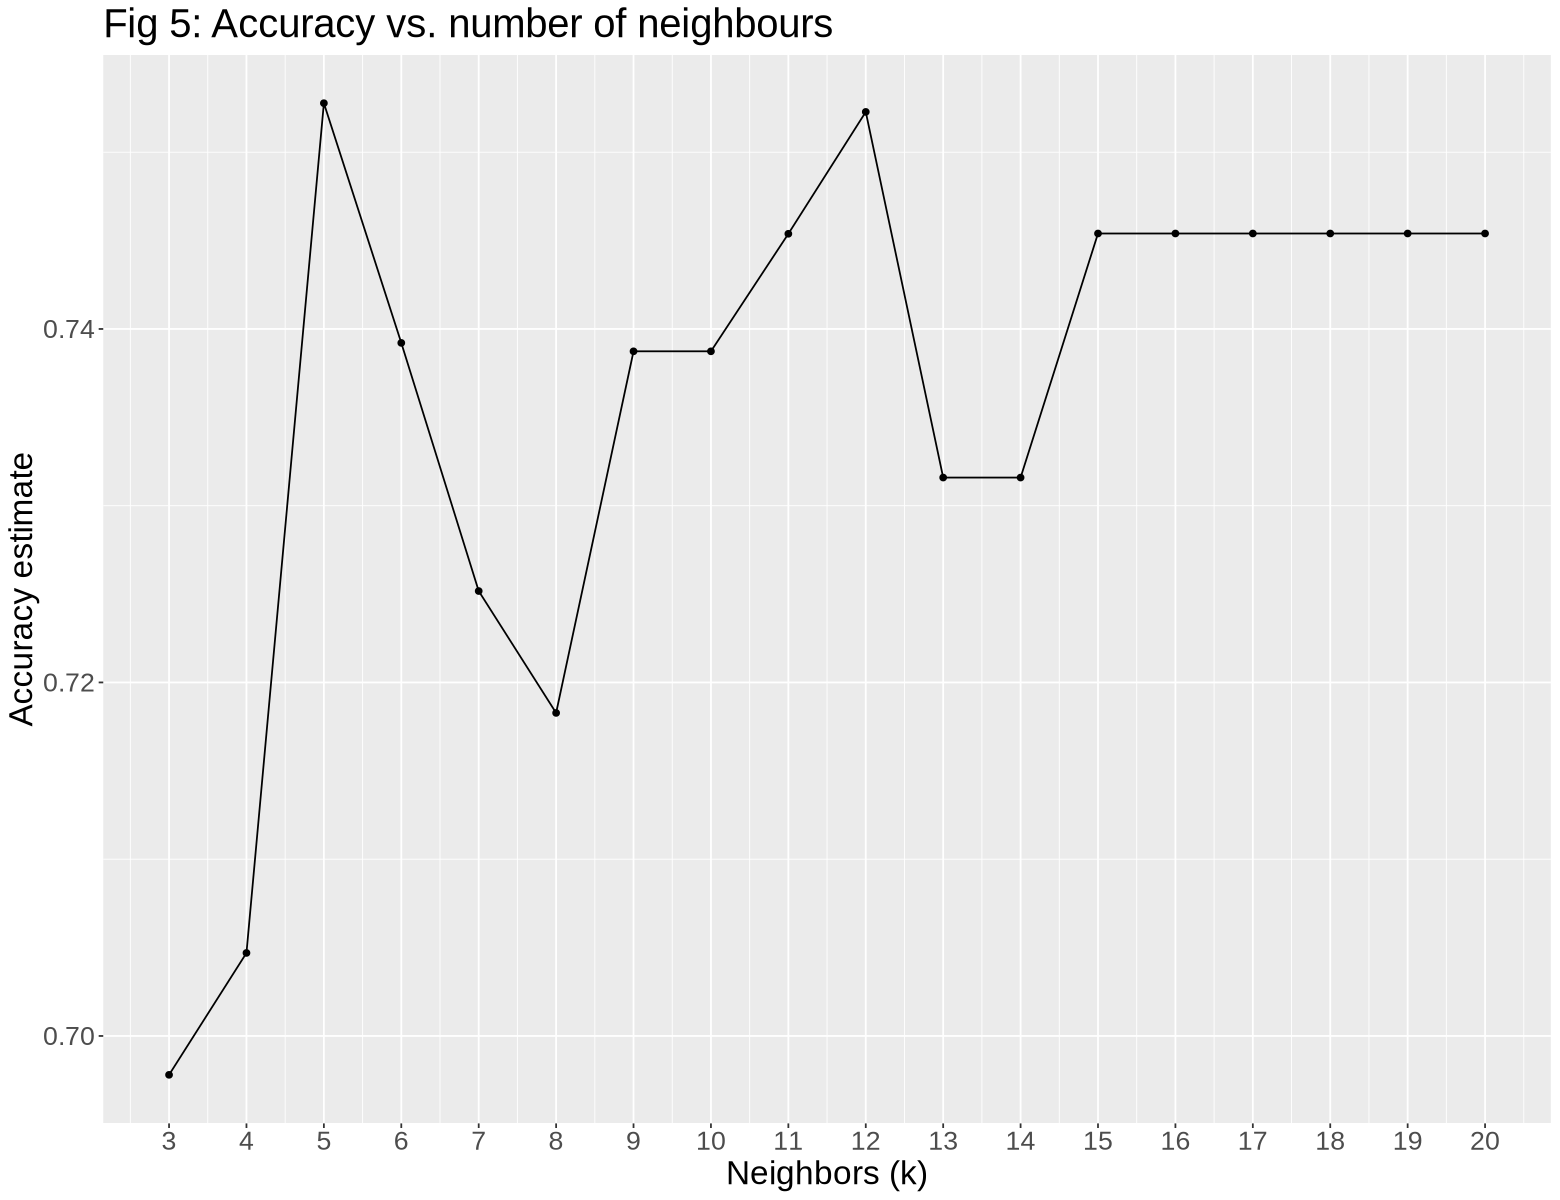

In [9]:
accuracies <- knn_fit |>
    filter(.metric == "accuracy")

cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors (k)", y = "Accuracy estimate", title = "Fig 5: Accuracy vs. number of neighbours") +
    scale_x_continuous(breaks = seq(3, 20, by = 1)) +
    theme(text = element_text(size = 20)) 
cross_val_plot

This plot is not what is typically expected when we make a best k plot, as it would usually come out as an elbow plot. We decided to choose k = 5 for our best k value because it is the smallest k value that has the highest accuracy. We could have also chosen k = 12 as a valid K value, but we chose 5 because it was smaller. All the K values would provide the same amount of accuraccy because the range of accuracy is very little. 

Finally, we did the K-NN classification at k = 5 and we found the accuracy of our k value. We discuss the impact of these results in our discussion section. 

In [10]:
players_spec<- nearest_neighbor(weight_func = "rectangular", neighbors = 5) |>
set_engine("kknn") |>
set_mode("classification")
players_fit<-workflow() |>
add_recipe(knn_recipe) |>
add_model(players_spec) |>
fit(data = knn_train)

players_predictions<-predict(players_fit , knn_test) |>
bind_cols(knn_test)
players_metrics<-players_predictions |>
metrics(truth = subscribe, estimate = .pred_class)   
players_conf_mat<- players_predictions|> 
conf_mat(truth = subscribe, estimate = .pred_class)
players_predictions
players_metrics
players_conf_mat

.pred_class,experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<fct>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>
TRUE,Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
TRUE,Veteran,TRUE,7a4686586d290c67179275c7c3dfb4ea02f4d317d9ee0e2cee98baa27877a875,1.6,Lane,Female,23
TRUE,Amateur,TRUE,3caa832978e0596779f4ee7c686c4592fb6de893925025d25bf26be9a8cd03f5,0.2,Thatcher,Male,22
TRUE,Amateur,FALSE,200db0417ee70863c7e2a0f214c737476fb86de5869d0b907a077d726357e687,0.1,Anastasia,Female,17
TRUE,Beginner,TRUE,89c8e07d6a2aa102d9cd05086d51b2e41195c9c807dd976a06f4262ff36d0cca,0.0,Ren,Male,17
TRUE,Regular,TRUE,5baba1651a0b92788bc0d6dcdf00be64af1cf9f0015bbeed204ddabd1d872e83,0.6,Kendall,Female,28
TRUE,Amateur,TRUE,710148466b44cb02ba894aa9005a4892e619250ebd01153055d6c7578fc1ea10,0.1,Ayman,Male,23
TRUE,Veteran,TRUE,577aa5f15468252b1c6f32dcd515012923476292e30f95e6b4128c770e993f92,0.1,Winston,Male,17
TRUE,Regular,FALSE,453774822d52d6891593948224570a750c4334616ff8aa74cd61fad9d4855752,0.0,Edmund,Prefer not to say,23


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.67346939
kap,binary,0.04156479


          Truth
Prediction FALSE TRUE
     FALSE     1    1
     TRUE     15   32

## Discussion

<span style="font-size: 15px;">
    
We found that using knn-classification with k = 5 neigbours produced a model that predicted whether a player will subscribe based on their age, played hours, and experience level with 67.35% accuracy. However, the model also produced a lot of false positives and the proportion of true to false predictions was far too high. 


**Summary of Visualisations** <br>
In Fig 2 and Fig 3, the played_hours is a relatively strong predictor of newsletter subscription, and the effect of played_hours varies across experience levels. Players who spend more time in the game are much more likely to subscribe, especially within groups such as Regular and Amateur. Age shows no clear relationship with subscription behaviour. Both subscribers and non-subscribers appear across the full age range.

For Fig 4, we looked at the distribution of subscribers across the different experience levels. The figure shows that the highest number of subscribers came from amateur and veteran players, and that there are more subscribers than non-subscribers in each category in the dataset. The least amount of subscribers come from pro players.

**Expectations vs. Results** <br>
The results from the exploratory visualisation mostly met our expectations. We expected the played_hours variable to be a really strong predictor because it makes sense that the more time someone spends playing videogames, the more likely they are to be invested in a gaming newsletter subscription. For the distribution of subscribers across the different experience levels, it makes sense that amateurs who are still getting into gaming and take it seriously would choose to subscribe to the newsletter, and pro players who already know what to expect from the game wouldn't feel the need to subscribe. The veteran players having the second most number of subscribers was surprising to us since we assumed this newsletter wouldn't interest someone who has been playing the game for a long time.

**Impact** <br>
From our analysis, there are too many false positives to reliably predict whether a certain type of player is more likely to subscribe to a gaming newsletter, so it's difficult to narrow down the impact of our findings. There is a general trend of people who play video games for longer (higher played_hours) as well as amateur and veteran players having the highest count of subscribers. Therefore, the team *can* target their recruitment efforts towards these demographics, however, the data analysis just is not accurate enough to consider this the most effective strategy.

**Future Questions** <br>
A relevant question that the limitations to our data analysis has presented is:

If there was a bigger number of participants in the survey, would there be a difference in our analysis?

We think that in the grand scheme of things, 197 participants is not a lot and it's hard predict human behaviour on such a small pool of people.

Another question is: "How effective of a predictor variable is experience level based on the assigned categories, and how could the categories be improved to be more specific?"

Experience level was a self-reported value that we feel can be quite subjective based on the options someone is able to choose on the survey that collected the data. For example, the two categories "Pro" and "Veteran" sounded like very similar skill levels to us.

<span>